In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import inspect
import os.path
from os import path

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
class LandmarksLoader:
    landmark_file = ""
    
    def __init__(self, landmark_file):
        self.landmark_file = landmark_file
        
    def load_landmarks_to_list(self, file):
        landmarks_frame = pd.read_json(file)
        k=1
        landmarksList = []
        for i in range(landmarks_frame.shape[0]):
            for j in range(landmarks_frame.shape[1]):
                if landmarks_frame.iloc[i,j] != None:
                    landmarksList.append(landmarks_frame.iloc[i,j])
                    k=k+1
        return landmarksList
    
    def show_image_landmark_by_index(i, list):
        plt.figure()
        plt.imshow(io.imread(os.path.join('./', list[i][0])))
        plt.scatter(list[i][1], list[i][2], s=10, marker='.', c='r')
        plt.pause(0.001)
        plt.show()
        
    def get_unique_images_from_list(self, list):
        images = []
        for e in list:
            if e[0] not in images:
                images.append(e[0])
        return images
    
    def group_landmark_for_image(self, landmarks_list):
        image_with_landmarks = []
        image_names = self.get_unique_images_from_list(landmarks_list)
        for image in image_names:
            x = []
            y = []
            for e in landmarks_list:
                if e[0] == image:
                    x.append(e[1])
                    y.append(e[2])
            image_with_landmarks.append([image, x, y])
        return image_with_landmarks
    
    def show_image_all_landmark_by_index(self, i, landmars_list):
        plt.figure()
        plt.imshow(io.imread(os.path.join('./', landmars_list[i][0])))
        plt.scatter(landmars_list[i][1], landmars_list[i][2], s=10, marker='.', c='r')
        plt.pause(0.001)
        plt.show()
        
    def loadFileToArray(self, landmarkFile):
        self.landmark_file = landmarkFile
        landmarks_list = self.load_landmarks_to_list(landmarkFile)
        image_with_all_landmarks = self.group_landmark_for_image(landmarks_list)
        return image_with_all_landmarks
        

In [3]:
loader = LandmarksLoader('./face_landmarks.json')

In [4]:
image_with_all_landmarks = loader.loadFileToArray('./face_landmarks.json')

In [5]:
del image_with_all_landmarks[17]
del image_with_all_landmarks[49]

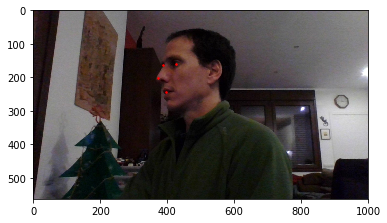

In [21]:
loader.show_image_all_landmark_by_index(303,image_with_all_landmarks)

In [7]:
len(image_with_all_landmarks)

325

In [8]:
image_with_all_landmarks[129]

['RicardPeralta/WIN_20191212_11_17_23_Pro (Pequeño).jpg',
 [396, 354, 355, 366],
 [208, 215, 236, 263]]

In [10]:
for i in range(len(image_with_all_landmarks)):
    #if not path.exists(image_with_all_landmarks[i][0]):
        print(image_with_all_landmarks[i][0])
        print(i)
    #loader.show_image_all_landmark_by_index(i,image_with_all_landmarks)

MarcelSerra/WIN_20191213_00_13_52_Pro.jpg
0
Genis/genis6.JPG
1
Genis/genis30.jpg
2
Genis/genis1.JPG
3
Genis/genis14.JPG
4
Genis/genis25.jpg
5
Genis/genis27.jpg
6
Genis/genis17.JPG
7
Genis/genis21.JPG
8
Genis/genis15.JPG
9
Genis/genis11.JPG
10
Genis/genis10.png
11
Genis/genis9.JPG
12
Genis/genis24.jpg
13
Genis/genis2.JPG
14
Genis/genis18.JPG
15
Genis/genis29.jpg
16
Genis/genis26.jpg
17
Genis/genis16.JPG
18
Genis/genis31.jpg
19
Genis/genis13.JPG
20
Genis/genis12.JPG
21
Genis/genis4.JPG
22
Genis/genis28.jpg
23
Genis/genis23.JPG
24
Genis/genis22.JPG
25
Genis/genis5.JPG
26
Genis/genis8.JPG
27
Genis/genis3.JPG
28
Genis/genis19.JPG
29
Pere/pere27.jpg
30
Pere/pere22.jpg
31
Pere/pere30.jpg
32
Pere/pere14.jpg
33
Pere/pere01.jpg
34
Pere/pere17.jpg
35
Pere/pere05.jpg
36
Pere/pere20.jpg
37
Pere/pere33.jpg
38
Pere/pere19.jpg
39
Pere/pere29.jpg
40
Pere/pere32.jpg
41
Pere/pere25.jpg
42
Pere/pere18.jpg
43
Pere/pere09.jpg
44
Pere/pere28.jpg
45
Pere/pere07.jpg
46
Pere/pere16.jpg
47
Pere/pere12.jpg
48
Per